In [2]:
import numpy as np
import matplotlib.pyplot as plt
import io
import base64
from IPython.display import HTML

import gym
from gym import wrappers
import qlearning

In [3]:
np.random.seed(42)

env = gym.make('CartPole-v0')
env = wrappers.Monitor(env, "./gym-results", force=True)
state = env.reset()
for step in range(10000):
    action = env.action_space.sample()
    new_state, reward, done, info = env.step(action)
    state = new_state
    if done:
        print("Episode finished after {} timesteps".format(step+1))
        break
env.close()

Episode finished after 12 timesteps


In [4]:
def play_video(env):
    video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data='''
        <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
    .format(encoded.decode('ascii')))

In [5]:
env = gym.make('CartPole-v0')
env = wrappers.Monitor(env, "./gym-results", force=True)

qlearning.random_play(env)

Episode finished after 10 timesteps


In [6]:
play_video(env)

In [19]:
# OpenAI Gym builds the environment for us inclusing all the rules, dynamics etc.
env = gym.make('CartPole-v0')
env = wrappers.Monitor(env, "./gym-results", force=True)

# How long do we want the agent to explore and learn
num_episodes = 500        

# Let us use Q-learning to learn the game!
q_table, total_reward = qlearning.train(env, num_episodes)
env.close()

Finished training!


In [20]:
play_video(env)

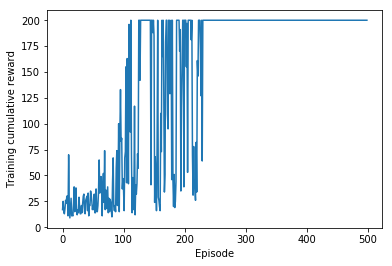

In [21]:
plt.plot(range(num_episodes), total_reward)
plt.xlabel('Episode')
plt.ylabel('Training cumulative reward')
plt.show()

In [22]:
env = gym.make('CartPole-v0')
env = wrappers.Monitor(env, "./gym-results", force=True)
qlearning.play(env, q_table, 100)
env.close()

Episode finished after 101 timesteps


In [23]:
play_video(env)